# PyEEM - Fluorescence Excitation-Emission Matrix (EEM) Spectroscopy
# Demo #1 - Rutherford et al.
## Load the PyEEM library and display version

In [1]:
import pyeem
print(pyeem.__version__)

1.0.8


## Check out the supported instruments

In [2]:
pyeem.instruments.supported

name
manufacturer supported_models              
Agilent      Cary 4E                cary_4e
             Cary Eclipse      cary_eclipse
Horiba       Aqualog-880-C          aqualog
             SPEX Fluorolog-3     fluorolog

## Check out the demo datasets

In [3]:
demos_df = pyeem.datasets.demos
display(demos_df)

print("Dataset description for the Rutherford et al. demo:")
print(demos_df[demos_df["demo_name"] == "rutherford"]["description"].item())

,demo_name,description,citation,DOI,absorbance_instrument,water_raman_instrument,EEM_instrument
0,rutherford,Excitation Emission Matrix (EEM) fluorescence ...,"Rutherford, Jay W., et al. ""Excitation emissio...",10.1016/j.atmosenv.2019.117065,Aqualog,None,Aqualog
1,drEEM,The demo dataset contains measurements made du...,"Murphy, Kathleen R., et al. ""Fluorescence spec...",10.1039/c3ay41160e,Cary 4E,Fluorolog,Fluorolog


Dataset description for the Rutherford et al. demo:
Excitation Emission Matrix (EEM) fluorescence spectra used for combustion generated particulate matter source identification using a neural network.


## Download the Rutherford et al. demo dataset from S3
- Please note that this step requires an internet connection because the data is downloaded from an AWS S3 bucket.

In [4]:
demo_data_dir = pyeem.datasets.download_demo(
    "demo_data", demo_name="rutherford"
)

Download Demo Dataset from S3: 239it [00:00, 405.09it/s]


## Load the dataset

In [5]:
"""
demo_data_dir = "demo_data/qinmin"
dataset = pyeem.datasets.Load(
    data_dir=demo_data_dir,
    raman_instrument=None,
    absorbance_instrument="cary_4e",
    eem_instrument="cary_eclipse",
    mode="w"
)
display(dataset.meta_df)
"""

"""
demo_data_dir = "demo_data/drEEM"
dataset = pyeem.datasets.Load(
    data_dir=demo_data_dir,
    raman_instrument="fluorolog",
    absorbance_instrument="cary_4e",
    eem_instrument="fluorolog",
    mode="w"
)
display(dataset.meta_df)
"""

calibration_sources = {
    "cigarette": "ug/ml",
    "diesel": "ug/ml",
    "wood_smoke": "ug/ml"
}
dataset = pyeem.datasets.Load(
    data_dir=demo_data_dir,
    raman_instrument=None,
    absorbance_instrument="aqualog",
    eem_instrument="aqualog",
    calibration_sources=calibration_sources,
    mode="w"
)

## Let's checkout the metadata
- The metadata contains information about collected sample sets which are composed of a few different scan types.

In [6]:
display(dataset.meta_df.head())

datetime_utc         filename collected_by  \
sample_set scan_type                                                      
1          blank_eem  2020-07-01 10:29:05   blank_eem1.csv           JR   
           sample_eem 2020-07-01 10:29:06  sample_eem1.csv           JR   
           sample_eem 2020-07-01 10:29:07  sample_eem2.csv           JR   
           sample_eem 2020-07-01 10:29:08  sample_eem3.csv           JR   
           sample_eem 2020-07-01 10:29:09  sample_eem4.csv           JR   

                                             description  \
sample_set scan_type                                       
1          blank_eem            Spectroscopy Grade Blank   
           sample_eem                            Diesel1   
           sample_eem                            Diesel2   
           sample_eem                            Diesel3   
           sample_eem  Cigarette from Cookstove Lab Hood   

                                                                comments  \
sample_set scan_type                                                       
1          blank_eem   Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   
           sample_eem  Raman units collected with 1 pixel binning so ...   

                       dilution  Raman_Area  cigarette  diesel  wood_smoke  \
sample_set scan_type                                                         
1          blank_eem        1.0   2040.3794       0.00     0.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.00     5.0         0.0   
           sample_eem       1.0   2040.3794       0.77     0.0         0.0   

                       calibration_sample  prototypical_sample  test_sample  \
sample_set scan_type                                                          
1          blank_eem                False                False        False   
           sample_eem                True                False         True   
           sample_eem                True                 True        False   
           sample_eem                True                False         True   
           sample_eem                True                False         True   

                      original_date  \
sample_set scan_type                  
1          blank_eem     2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   
           sample_eem    2016-11-30   

                                                                filepath  \
sample_set scan_type                                                       
1          blank_eem   /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   

                              name prototypical_source test_sources  \
sample_set scan_type                                                  
1          blank_eem    blank_eem1                               []   
           sample_eem  sample_eem1              diesel           []   
           sample_eem  sample_eem2              diesel           []   
           sample_eem  sample_eem3              diesel           []   
           sample_eem  sample_eem4           cigarette           []   

                                            hdf_path  
sample_set scan_type                                  
1          blank_eem    raw_sampl

## Checkout the metadata summary information

In [7]:
dataset.metadata_summary_info()

,Date Range,Number of Sample Sets,Number of blank EEMs,Number of sample EEMs,Number of water raman scans,Number of absorbance scans
0,"(Timestamp('2020-07-01 10:29:05'), Timestamp('...",14,20,107,0,107


## Create a preprocessing routine
- The demo dataset contains raw scans, in order to analyze and interpret this data, we must first apply several preprocessing steps.

In [8]:
routine_df = pyeem.preprocessing.create_routine(
    crop = True,
    discrete_wavelengths = False,
    gaussian_smoothing = False,
    blank_subtraction = True,
    inner_filter_effect = True,
    raman_normalization = True,
    scatter_removal = True,
    dilution = False,
)

display(routine_df)

,step_name,hdf_path
step_order,,
0,raw,raw_sample_sets/
1,crop,preprocessing/filters/crop
2,blank_subtraction,preprocessing/corrections/blank_subtraction
3,inner_filter_effect,preprocessing/corrections/inner_filter_effect
4,raman_normalization,preprocessing/corrections/raman_normalization
5,scatter_removal,preprocessing/corrections/scatter_removal
6,complete,preprocessing/complete/


## Execute the preprocessing routine
- Each preprocessing step has certain knobs and dials you can tune to have them run to your liking. It is worth checking the documentation to learn more about these customizations.
- Please note that depending on the steps and settings you've chosen as well as your dataset's size, the time it takes for this step to complete will vary.

In [9]:
crop_dimensions = {
    "emission_bounds": (246, 573),
    "excitation_bounds": (224, float("inf"))
}
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    crop_dims=crop_dimensions,
    raman_source_type = "metadata",
    fill="interp",
    progress_bar=True
)

display(routine_results_df)

Preprocessing scan sets: 100%|██████████| 14/14 [01:36<00:00,  6.92s/it]


step_completed  \
sample_set scan_type  name        step_name                            
1          blank_eem  blank_eem1  raw                           True   
                                  crop                          True   
           sample_eem sample_eem1 raw                           True   
                                  crop                          True   
                                  blank_subtraction             True   
...                                                              ...   
16         sample_eem sample_eem1 raman_normalization           True   
                                  scatter_removal               True   
                                  complete                      True   
17         blank_eem  blank_eem1  raw                           True   
                                  crop                          True   

                                                      step_exception  \
sample_set scan_type  name        step_name                            
1          blank_eem  blank_eem1  raw                           None   
                                  crop                          None   
           sample_eem sample_eem1 raw                           None   
                                  crop                          None   
                                  blank_subtraction             None   
...                                                              ...   
16         sample_eem sample_eem1 raman_normalization           None   
                                  scatter_removal               None   
                                  complete                      None   
17         blank_eem  blank_eem1  raw                           None   
                                  crop                          None   

                                                                                                hdf_path  \
sample_set scan_type  name        step_name                                                                
1          blank_eem  blank_eem1  raw                                       raw_sample_sets/1/blank_eem1   
                                  crop                           preprocessing/filters/crop/1/blank_eem1   
           sample_eem sample_eem1 raw                                      raw_sample_sets/1/sample_eem1   
                                  crop                          preprocessing/filters/crop/1/sample_eem1   
                                  blank_subtraction    preprocessing/corrections/blank_subtraction/1/...   
...                                                                                                  ...   
16         sample_eem sample_eem1 raman_normalization  preprocessing/corrections/raman_normalization/...   
                                  scatter_removal      preprocessing/corrections/scatter_removal/16/s...   
                                  complete                         preprocessing/complete/16/sample_eem1   
17         blank_eem  blank_eem1  raw                                      raw_sample_sets/17/blank_eem1   
                                  crop                          preprocessing/filters/crop/17/blank_eem1   

                                                               units  
sample_set scan_type  name        step_name                           
1          blank_eem  blank_eem1  raw                  Intensity, AU  
                                  crop                 Intensity, AU  
           sample_eem sample_eem1 raw                  Intensity, AU  
                                  crop                 Intensity, AU  
                                  blank_subtraction    Intensity, AU  
...                                                              ...  
16         sample_eem sample_eem1 raman_normalization  Intensity, RU  
                                  scatter_removal      Intensity, RU  
                                  complete             Intensity,

## Check to see if any of the steps failed to complete
- If you are using a demo dataset, you should see an empty dataframe.

In [10]:
display(routine_results_df[routine_results_df["step_exception"].notna()])

,,,,step_completed,step_exception,hdf_path,units
sample_set,scan_type,name,step_name,,,,


## Visualize the preprocessing steps for a single sample

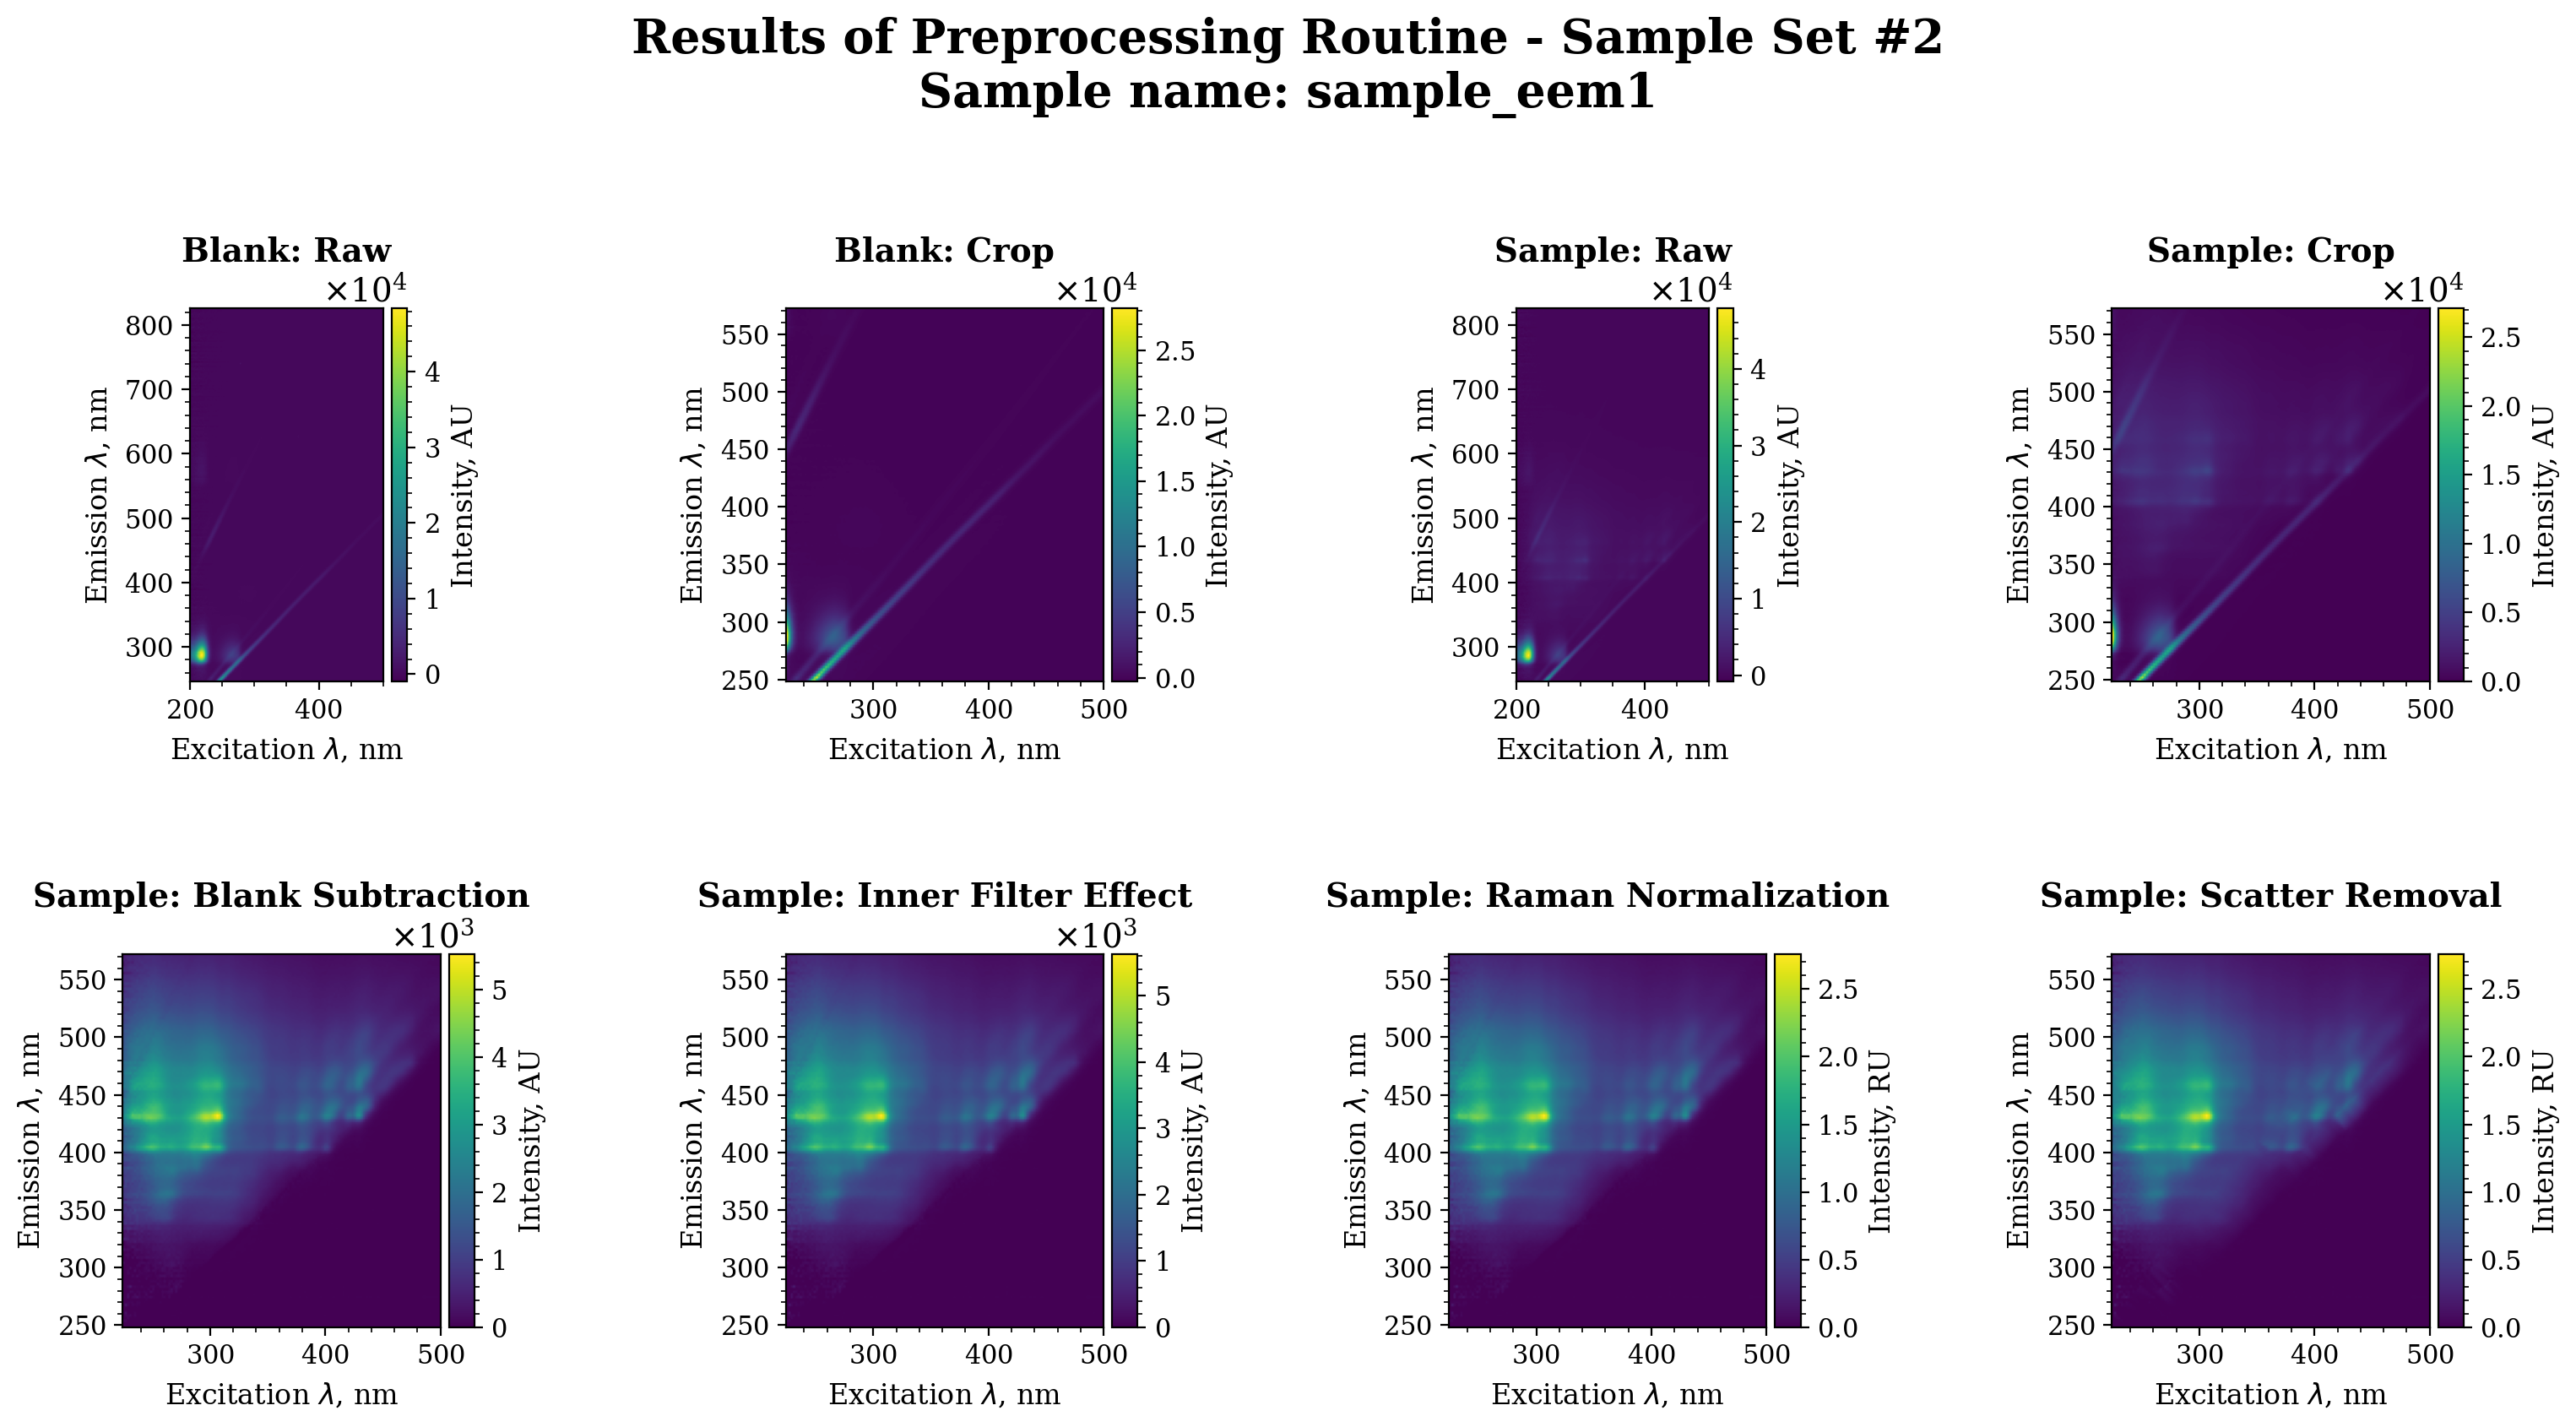

In [399]:
import matplotlib.pyplot as plt

sample_set = 2
sample_name = "sample_eem1"
axes = pyeem.plots.plot_preprocessing(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="imshow",
    fig_kws={"dpi": 200},
)
plt.show()

## Load the calibration information

In [12]:
cal_df = pyeem.preprocessing.calibration(dataset, routine_results_df)
display(cal_df)

concentration  \
source     source_units intensity_units measurement_units        slope       intercept    r_squared                  
cigarette  ug/ml        Intensity, RU   Integrated Intensity, RU 2532.409217 -620.162018  0.929928            0.77   
                                                                                          0.929928            5.00   
                                                                                          0.929928            5.00   
                                                                                          0.929928            5.00   
                                                                                          0.929928            5.00   
...                                                                                                            ...   
wood_smoke ug/ml        Intensity, RU   Integrated Intensity, RU 4860.709872 -1572.345781 0.460195            0.50   
                                                                                          0.460195            0.50   
                                                                                          0.460195            2.00   
                                                                                          0.460195            1.00   
                                                                                          0.460195            5.00   

                                                                                                     integrated_intensity  \
source     source_units intensity_units measurement_units        slope       intercept    r_squared                         
cigarette  ug/ml        Intensity, RU   Integrated Intensity, RU 2532.409217 -620.162018  0.929928            1605.582491   
                                                                                          0.929928           11369.642711   
                                                                                          0.929928            9937.219073   
                                                                                          0.929928           14786.022223   
                                                                                          0.929928           14005.964492   
...                                                                                                                   ...   
wood_smoke ug/ml        Intensity, RU   Integrated Intensity, RU 4860.709872 -1572.345781 0.460195            2654.533537   
                                                                                          0.460195             856.330949   
                                                                                          0.460195            3413.400549   
                                                                                          0.460195            1719.608567   
                                                                                          0.460195           23200.187472   

                                                                                                     prototypical_sample  \
source     source_units intensity_units measurement_units        slope       intercept    r_squared                        
cigarette  ug/ml        Intensity, RU   Integrated Intensity, RU 2532.409217 -620.162018  0.929928                 False   
                                                                                          0.929928                  True   
                                                                                          0.929928                  True   
                                                                                          0.929928                 False   
                                                                                          0.929928                 False   
...                                                                     

## Checkout the calibration summary information

In [13]:
cal_summary_df = pyeem.preprocessing.calibration_summary_info(cal_df)
display(cal_summary_df)

,source,source_units,intensity_units,measurement_units,slope,intercept,r_squared,Number of Samples,Min. Concentration,Max. Concentration
0,cigarette,ug/ml,"Intensity, RU","Integrated Intensity, RU",2532.409217,-620.162018,0.929928,26,0.2,5.0
1,cigarette,ug/ml,"Intensity, RU","Integrated Intensity, RU",2532.409217,-620.162018,0.929928,26,0.2,5.0
2,cigarette,ug/ml,"Intensity, RU","Integrated Intensity, RU",2532.409217,-620.162018,0.929928,26,0.2,5.0


## Plot the calibration curves

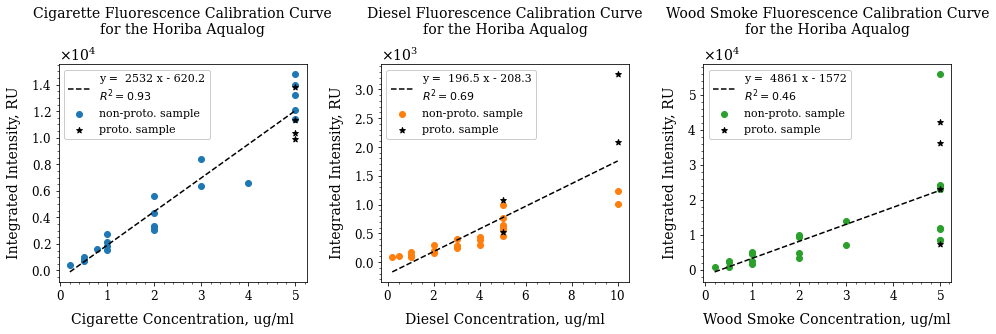

In [14]:
axes = pyeem.plots.plot_calibration_curves(dataset, cal_df)
plt.show()

## Create prototypical spectra and then plot them

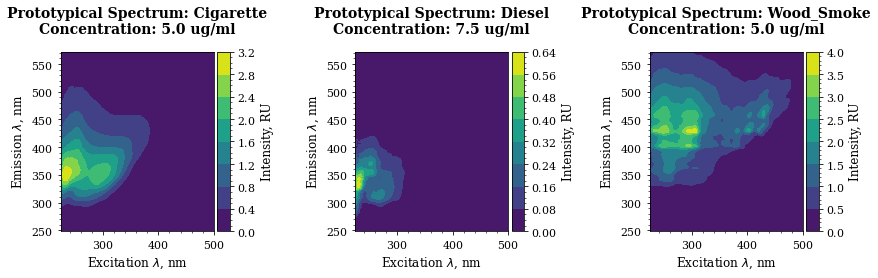

In [15]:
proto_results_df = pyeem.augmentation.create_prototypical_spectra(dataset, cal_df)
axes = pyeem.plots.plot_prototypical_spectra(
    dataset, proto_results_df, plot_type="contour"
)
plt.show()

## Augmented Spectra - Single Sources
### Create augmented single source spectra by scaling each prototypical spectrum across a range of concentrations

In [16]:
ss_results_df = pyeem.augmentation.create_single_source_spectra(
    dataset, cal_df, conc_range=(0, 5), num_spectra=100
)

100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


## Plot the augmented single source spectra

In [398]:
from IPython.display import HTML
%matplotlib inline

source = "wood_smoke"
anim = pyeem.plots.single_source_animation(
    dataset,
    ss_results_df,
    source=source,
    plot_type="surface_contour",
    fig_kws={"dpi": 175},
    animate_kws={"interval": 100, "blit": True},
    surface_plot_kws={"rstride":10,"cstride":10}
)
#HTML(anim.to_html5_video())
anim.save('%s_contour.mp4' % source, dpi=175)

ValueError: not enough values to unpack (expected 5, got 0)

ValueError: not enough values to unpack (expected 5, got 0)

<Figure size 1050x700 with 2 Axes>

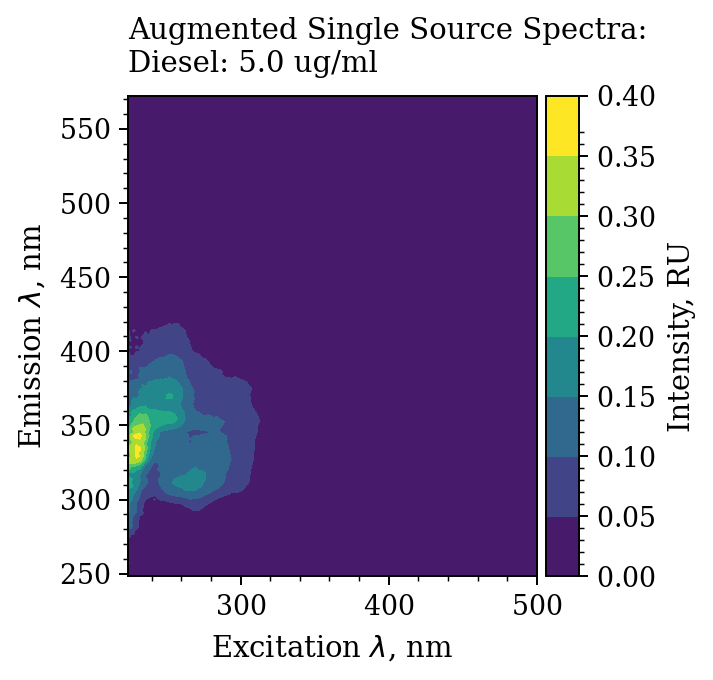

In [18]:
source = "diesel"
anim = pyeem.plots.single_source_animation(
    dataset,
    ss_results_df,
    source=source,
    plot_type="contour",
    fig_kws={"dpi": 175},
    animate_kws={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())
#anim.save('%s.mp4' % source, dpi=175)

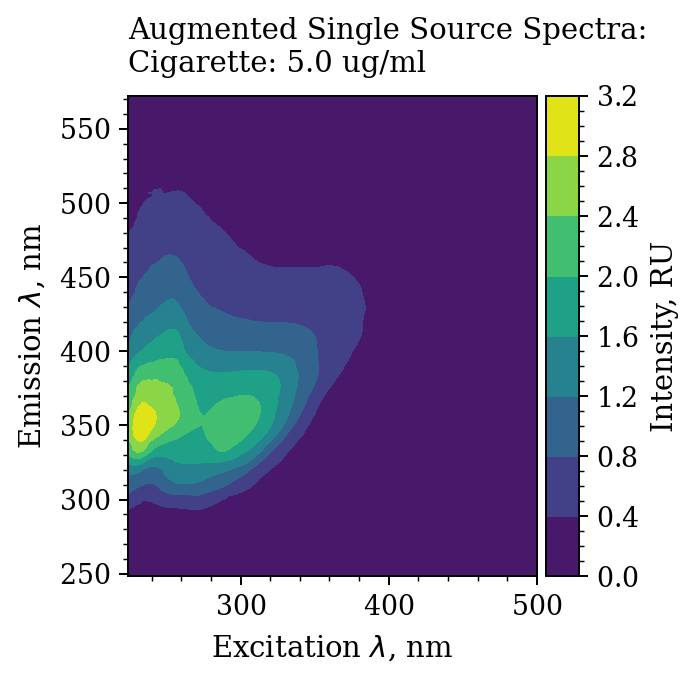

In [19]:
source = "cigarette"
anim = pyeem.plots.single_source_animation(
    dataset,
    ss_results_df,
    source=source,
    plot_type="contour",
    fig_kws={"dpi": 175},
    animate_kws={"interval": 100, "blit": True},
)
HTML(anim.to_html5_video())
#anim.save('%s.mp4' % source, dpi=175)

## Augmented Spectra - Mixtures
### Create augmented mixture spectra by scaling and combining the prototypical spectra across a range of concentrations

In [20]:
mix_results_df = pyeem.augmentation.create_mixtures(
    dataset, cal_df, conc_range=(0.01, 6.3), num_steps=5
)

Creating Augmented Mixtures: 100%|██████████| 125/125 [00:03<00:00, 35.82it/s]


## Plot the augmented mixture spectra

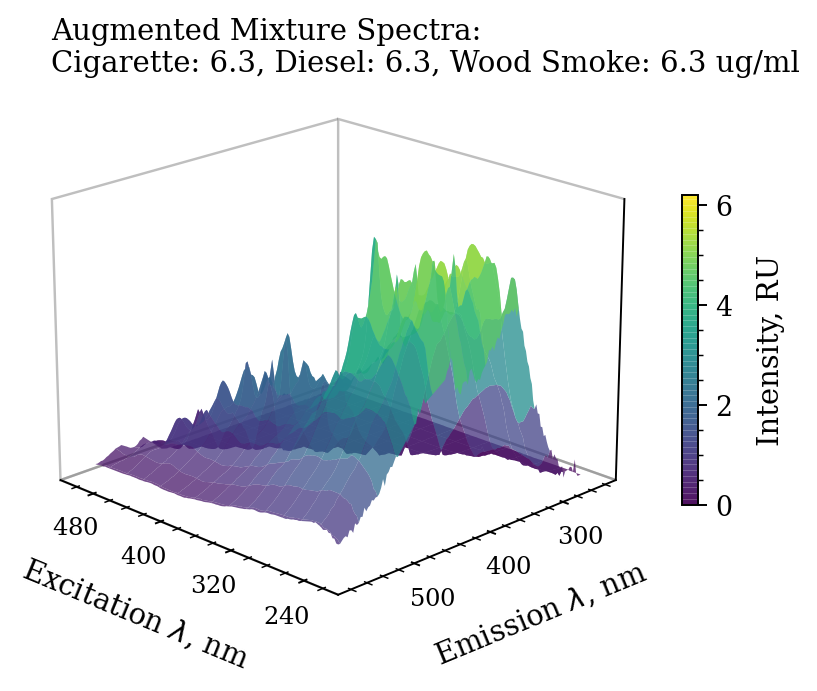

In [21]:
anim = pyeem.plots.mixture_animation(
    dataset,
    mix_results_df,
    plot_type="surface",
    fig_kws={"dpi": 175},
    animate_kws={"interval": 100, "blit": True},
    surface_plot_kws={"rstride":10,"cstride":10}
)
HTML(anim.to_html5_video())
#anim.save('mix.mp4', dpi=175)

# REFACTOR

In [381]:
import pandas as pd
import numpy as np

def model_data():
    sources = list(dataset.calibration_sources.keys())
    aug_results_df = pd.concat([ss_results_df, mix_results_df])
    aug_df = []
    for p in aug_results_df.index.get_level_values("hdf_path").unique().to_list():
        aug_df.append(pd.read_hdf(dataset.hdf, key=p))

    aug_df = pd.concat(aug_df)

    drop_indices = list(aug_df.index.names)
    keep_indices = sources + ["source", "emission_wavelength"]
    for keep in keep_indices:
        drop_indices.remove(keep)

    X, y = [], []

    aug_df.index = aug_df.index.droplevel(drop_indices)
    for concentrations, eem_df in aug_df.groupby(sources + ["source"], as_index=False):
        drop_indices = list(eem_df.index.names)
        drop_indices.remove("emission_wavelength")
        eem_df.index = eem_df.index.droplevel(drop_indices)

        eem_np = eem_df.values
        eem_np = eem_np.reshape(eem_df.shape[0], eem_df.shape[1], 1)

        X.append(eem_np)
        y.append(concentrations[:-1])

    print(np.array(X).shape)
    print(np.array(y).shape)


%time model_data()

(425, 142, 139, 1)
(425, 3)
CPU times: user 213 ms, sys: 64.5 ms, total: 277 ms
Wall time: 276 ms


# REFACTOR

In [61]:
samples = dataset.meta_df[dataset.meta_df["test_sample"]].xs("sample_eem", level="scan_type", drop_level=False)
samples.rename(columns={"hdf_path": "raw_hdf_path"}, inplace=True)

t = routine_results_df.xs("sample_eem", level="scan_type", drop_level=False)
t = t.groupby(
    level=["sample_set", "scan_type", "name"]
).filter(lambda x: x["step_completed"].all())

t = t.xs("complete", level="step_name", drop_level=False)[["step_completed", "hdf_path", "units"]]
t = t.reset_index(level=["name", "step_name"])


joined = pd.merge(samples, t, on=["sample_set", "scan_type", "name"])
joined.rename(columns={"units": "intensity_units"}, inplace=True)

sources = list(dataset.calibration_sources.keys())
source_units = list(set(dataset.calibration_sources.values()))
if len(source_units) != 1:
    raise Exception(
        "All calibration/test sources are must reported in the same units."
    )
source_units = source_units[0]
joined["source_units"] = source_units

keep_cols = ["intensity_units", "hdf_path", "source_units"] 
keep_cols += sources
joined = joined[keep_cols].reset_index(drop=True)

def blah(x):
    z = x.to_frame().T[sources]
    z = z.columns[z[sources].any()].values
    
    source = np.NaN
    if len(z) == 1:
        source = z[0]
    elif len(z) > 1:
        source = "mixture"

    return source

joined["source"] = joined.apply(blah, axis=1)
sort_cols = ["source"] + sources
joined.sort_values(sort_cols, inplace=True, ignore_index=True)
joined = joined.set_index(["source", "source_units", "intensity_units", "hdf_path"])

display(joined)

cigarette  \
source     source_units intensity_units hdf_path                                            
cigarette  ug/ml        Intensity, RU   preprocessing/complete/13/sample_eem1        0.20   
                                        preprocessing/complete/13/sample_eem2        0.50   
                                        preprocessing/complete/15/sample_eem7        0.50   
                                        preprocessing/complete/15/sample_eem4        0.50   
                                        preprocessing/complete/1/sample_eem4         0.77   
...                                                                                   ...   
wood_smoke ug/ml        Intensity, RU   preprocessing/complete/11/sample_eem11       0.00   
                                        preprocessing/complete/11/sample_eem12       0.00   
                                        preprocessing/complete/12/sample_eem3        0.00   
                                        preprocessing/complete/12/sample_eem4        0.00   
                                        preprocessing/complete/13/sample_eem18       0.00   

                                                                                diesel  \
source     source_units intensity_units hdf_path                                         
cigarette  ug/ml        Intensity, RU   preprocessing/complete/13/sample_eem1      0.0   
                                        preprocessing/complete/13/sample_eem2      0.0   
                                        preprocessing/complete/15/sample_eem7      0.0   
                                        preprocessing/complete/15/sample_eem4      0.0   
                                        preprocessing/complete/1/sample_eem4       0.0   
...                                                                                ...   
wood_smoke ug/ml        Intensity, RU   preprocessing/complete/11/sample_eem11     0.0   
                                        preprocessing/complete/11/sample_eem12     0.0   
                                        preprocessing/complete/12/sample_eem3      0.0   
                                        preprocessing/complete/12/sample_eem4      0.0   
                                        preprocessing/complete/13/sample_eem18     0.0   

                                                                                wood_smoke  
source     source_units intensity_units hdf_path                                            
cigarette  ug/ml        Intensity, RU   preprocessing/complete/13/sample_eem1          0.0  
                                        preprocessing/complete/13/sample_eem2          0.0  
                                        preprocessing/complete/15/sample_eem7          0.0  
                                        preprocessing/complete/15/sample_eem4          0.0  
                                        preprocessing/complete/1/sample_eem4           0.0  
...                                                                                    ...  
wood_smoke ug/ml        Intensity, RU   preprocessing/complete/11/sample_eem11         5.0  
                                        preprocessing/complete/11/sample_eem12         5.0  
                                        preprocessing/complete/12/sample_eem3          5.0  
                                        preprocessing/complete/12/sample_eem4          5.0  
                                        preprocessing/complete/13/sample_eem18         5.0  

[95 rows x 3 columns]

In [382]:
def get_test_data():
    sources = joined.index.get_level_values("source").unique().values
    sources = np.delete(sources, np.where(sources == "mixture"))

    X = []
    y = []
    
    def _get_spectra(group):
        hdf_path = group.index.get_level_values("hdf_path").item()
        eem_df = pd.read_hdf(dataset.hdf, key=hdf_path)
        eem_np = eem_df.values
        eem_np = eem_np.reshape(eem_df.shape[0], eem_df.shape[1], 1)
        return eem_np
    
    def _get_concentrations(group):
        concentrations = group[sources].values[0]
        return concentrations
    
    X = joined.groupby("hdf_path").apply(_get_spectra)
    y = joined.groupby("hdf_path").apply(_get_concentrations)
    
    X = np.stack(X.reset_index(drop=True).to_numpy())
    y = np.stack(y.reset_index(drop=True).to_numpy())
    
    return X, y

%time X_test, y_test = get_test_data()

CPU times: user 389 ms, sys: 7.76 ms, total: 397 ms
Wall time: 396 ms


In [387]:
def get_train_data():
    sources = list(dataset.calibration_sources.keys())
    aug_results_df = pd.concat([ss_results_df, mix_results_df])
    aug_df = []
    for p in aug_results_df.index.get_level_values("hdf_path").unique().to_list():
        aug_df.append(pd.read_hdf(dataset.hdf, key=p))

    aug_df = pd.concat(aug_df)
    display(aug_df)
    drop_indices = list(aug_df.index.names)
    keep_indices = sources + ["source", "emission_wavelength"]
    for keep in keep_indices:
        drop_indices.remove(keep)
        
    aug_df.index = aug_df.index.droplevel(drop_indices)

    def _get_spectra(eem_df):
        drop_indices = list(eem_df.index.names)
        drop_indices.remove("emission_wavelength")
        eem_df.index = eem_df.index.droplevel(drop_indices)
        eem_np = eem_df.values
        eem_np = eem_np.reshape(eem_df.shape[0], eem_df.shape[1], 1)
        return eem_np

    def _get_concentrations(group):
        group.reset_index(inplace=True, drop=False)
        concentrations = group[sources].values[0]
        return concentrations

    X = aug_df.groupby(sources + ["source"]).apply(_get_spectra)
    y = aug_df.groupby(sources).apply(_get_concentrations)

    X = np.stack(X.reset_index(drop=True).to_numpy())
    y = np.stack(y.reset_index(drop=True).to_numpy())

    return X, y

%time x_train, y_train = get_train_data()

224.0  \
source    source_units intensity_units hdf_path                              cigarette diesel wood_smoke emission_wavelength             
cigarette ug/ml        Intensity, RU   augmentation/single_sources/cigarette 0.0       0.0    0.0        248.158             -0.000000   
                                                                                                         250.400             -0.000000   
                                                                                                         252.643             -0.000000   
                                                                                                         254.887              0.000000   
                                                                                                         257.131              0.000000   
...                                                                                                                                ...   
mixture   ug/ml        Intensity, RU   augmentation/mixtures                 6.3       6.3    6.3        562.901              0.756759   
                                                                                                         565.246              0.735243   
                                                                                                         567.592              0.686551   
                                                                                                         569.938              0.635394   
                                                                                                         572.284              0.639494   

                                                                                                                                 226.0  \
source    source_units intensity_units hdf_path                              cigarette diesel wood_smoke emission_wavelength             
cigarette ug/ml        Intensity, RU   augmentation/single_sources/cigarette 0.0       0.0    0.0        248.158             -0.000000   
                                                                                                         250.400             -0.000000   
                                                                                                         252.643             -0.000000   
                                                                                                         254.887              0.000000   
                                                                                                         257.131              0.000000   
...                                                                                                                                ...   
mixture   ug/ml        Intensity, RU   augmentation/mixtures                 6.3       6.3    6.3        562.901              0.861181   
                                                                                                         565.246              0.742918   
                                                                                                         567.592              0.679290   
                                                                                                         569.938              0.696988   
                                                                                                         572.284              0.644073   

                                                                                                                                 228.0  \
source    source_units intensity_units hdf_path                              cigarette diesel wood_smoke emission_wavelength             
cigarette ug/ml        Intensity, RU   augmentation/single_sources/cigarette 0.0       0.0    0.0        248.158             -0.000000   
                                                                                                         250.400             

CPU times: user 1.54 s, sys: 241 ms, total: 1.78 s
Wall time: 1.78 s


In [385]:
def get_model_data():
    x_test, y_test = get_test_data()
    x_train, y_train = get_train_data()
    return (x_test, y_test), (x_train, y_train)

In [386]:
%time (x_test, y_test), (x_train, y_train) = get_model_data()

CPU times: user 1.71 s, sys: 185 ms, total: 1.89 s
Wall time: 1.89 s
